In [16]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

In [17]:
data = pd.read_csv('/content/bank-additional-full.csv', sep=';')


In [13]:
data

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,...,campaign,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,y
0,56,housemaid,married,basic.4y,no,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
1,57,services,married,high.school,unknown,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
2,37,services,married,high.school,no,yes,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
3,40,admin.,married,basic.6y,no,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
4,56,services,married,high.school,no,no,yes,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
41183,73,retired,married,professional.course,no,yes,no,cellular,nov,fri,...,1,999,0,nonexistent,-1.1,94.767,-50.8,1.028,4963.6,yes
41184,46,blue-collar,married,professional.course,no,no,no,cellular,nov,fri,...,1,999,0,nonexistent,-1.1,94.767,-50.8,1.028,4963.6,no
41185,56,retired,married,university.degree,no,yes,no,cellular,nov,fri,...,2,999,0,nonexistent,-1.1,94.767,-50.8,1.028,4963.6,no
41186,44,technician,married,professional.course,no,no,no,cellular,nov,fri,...,1,999,0,nonexistent,-1.1,94.767,-50.8,1.028,4963.6,yes


In [14]:
data.shape

(41188, 21)

In [19]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 41188 entries, 0 to 41187
Data columns (total 21 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   age             41188 non-null  int64  
 1   job             41188 non-null  object 
 2   marital         41188 non-null  object 
 3   education       41188 non-null  object 
 4   default         41188 non-null  object 
 5   housing         41188 non-null  object 
 6   loan            41188 non-null  object 
 7   contact         41188 non-null  object 
 8   month           41188 non-null  object 
 9   day_of_week     41188 non-null  object 
 10  duration        41188 non-null  int64  
 11  campaign        41188 non-null  int64  
 12  pdays           41188 non-null  int64  
 13  previous        41188 non-null  int64  
 14  poutcome        41188 non-null  object 
 15  emp.var.rate    41188 non-null  float64
 16  cons.price.idx  41188 non-null  float64
 17  cons.conf.idx   41188 non-null 

In [21]:
data.isnull().sum()

,0
age,0
job,0
marital,0
education,0
default,0
housing,0
loan,0
contact,0
month,0
day_of_week,0


In [22]:
data.duplicated().sum()

np.int64(12)

In [23]:
categorical_columns=data.select_dtypes(include='object').columns
print(categorical_columns)
numerical_columns=data.select_dtypes(exclude='object').columns
print(numerical_columns)

Index(['job', 'marital', 'education', 'default', 'housing', 'loan', 'contact',
       'month', 'day_of_week', 'poutcome', 'y'],
      dtype='object')
Index(['age', 'duration', 'campaign', 'pdays', 'previous', 'emp.var.rate',
       'cons.price.idx', 'cons.conf.idx', 'euribor3m', 'nr.employed'],
      dtype='object')


In [24]:
data.describe(include='object')

,job,marital,education,default,housing,loan,contact,month,day_of_week,poutcome,y
count,41188,41188,41188,41188,41188,41188,41188,41188,41188,41188,41188
unique,12,4,8,3,3,3,2,10,5,3,2
top,admin.,married,university.degree,no,yes,no,cellular,may,thu,nonexistent,no
freq,10422,24928,12168,32588,21576,33950,26144,13769,8623,35563,36548


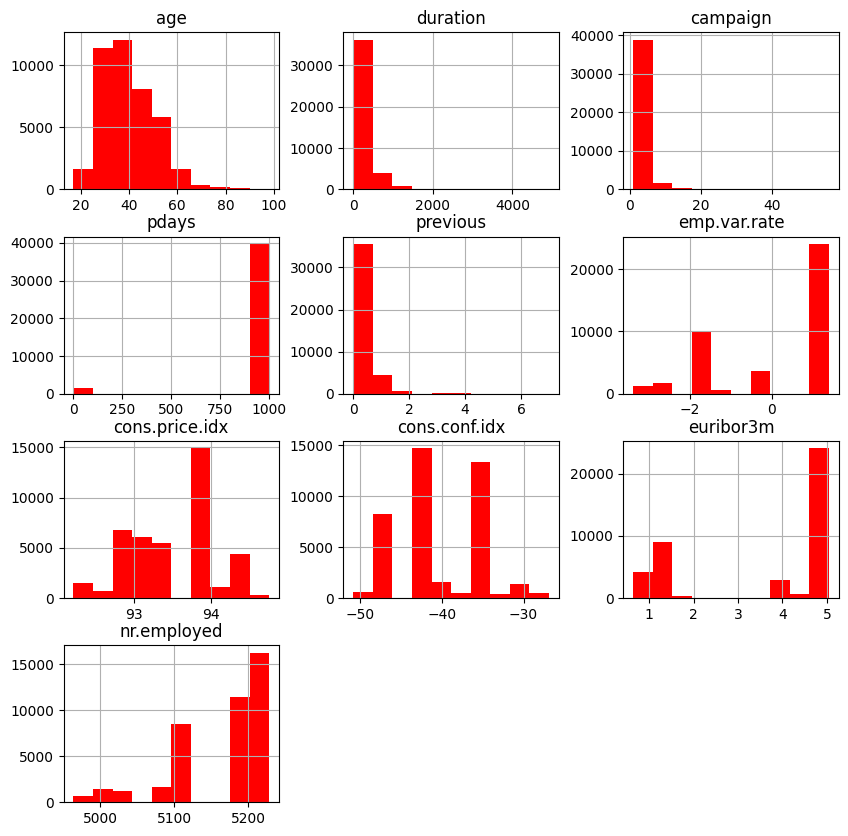

In [26]:
data.hist(figsize=(10,10),color="red")
plt.show()

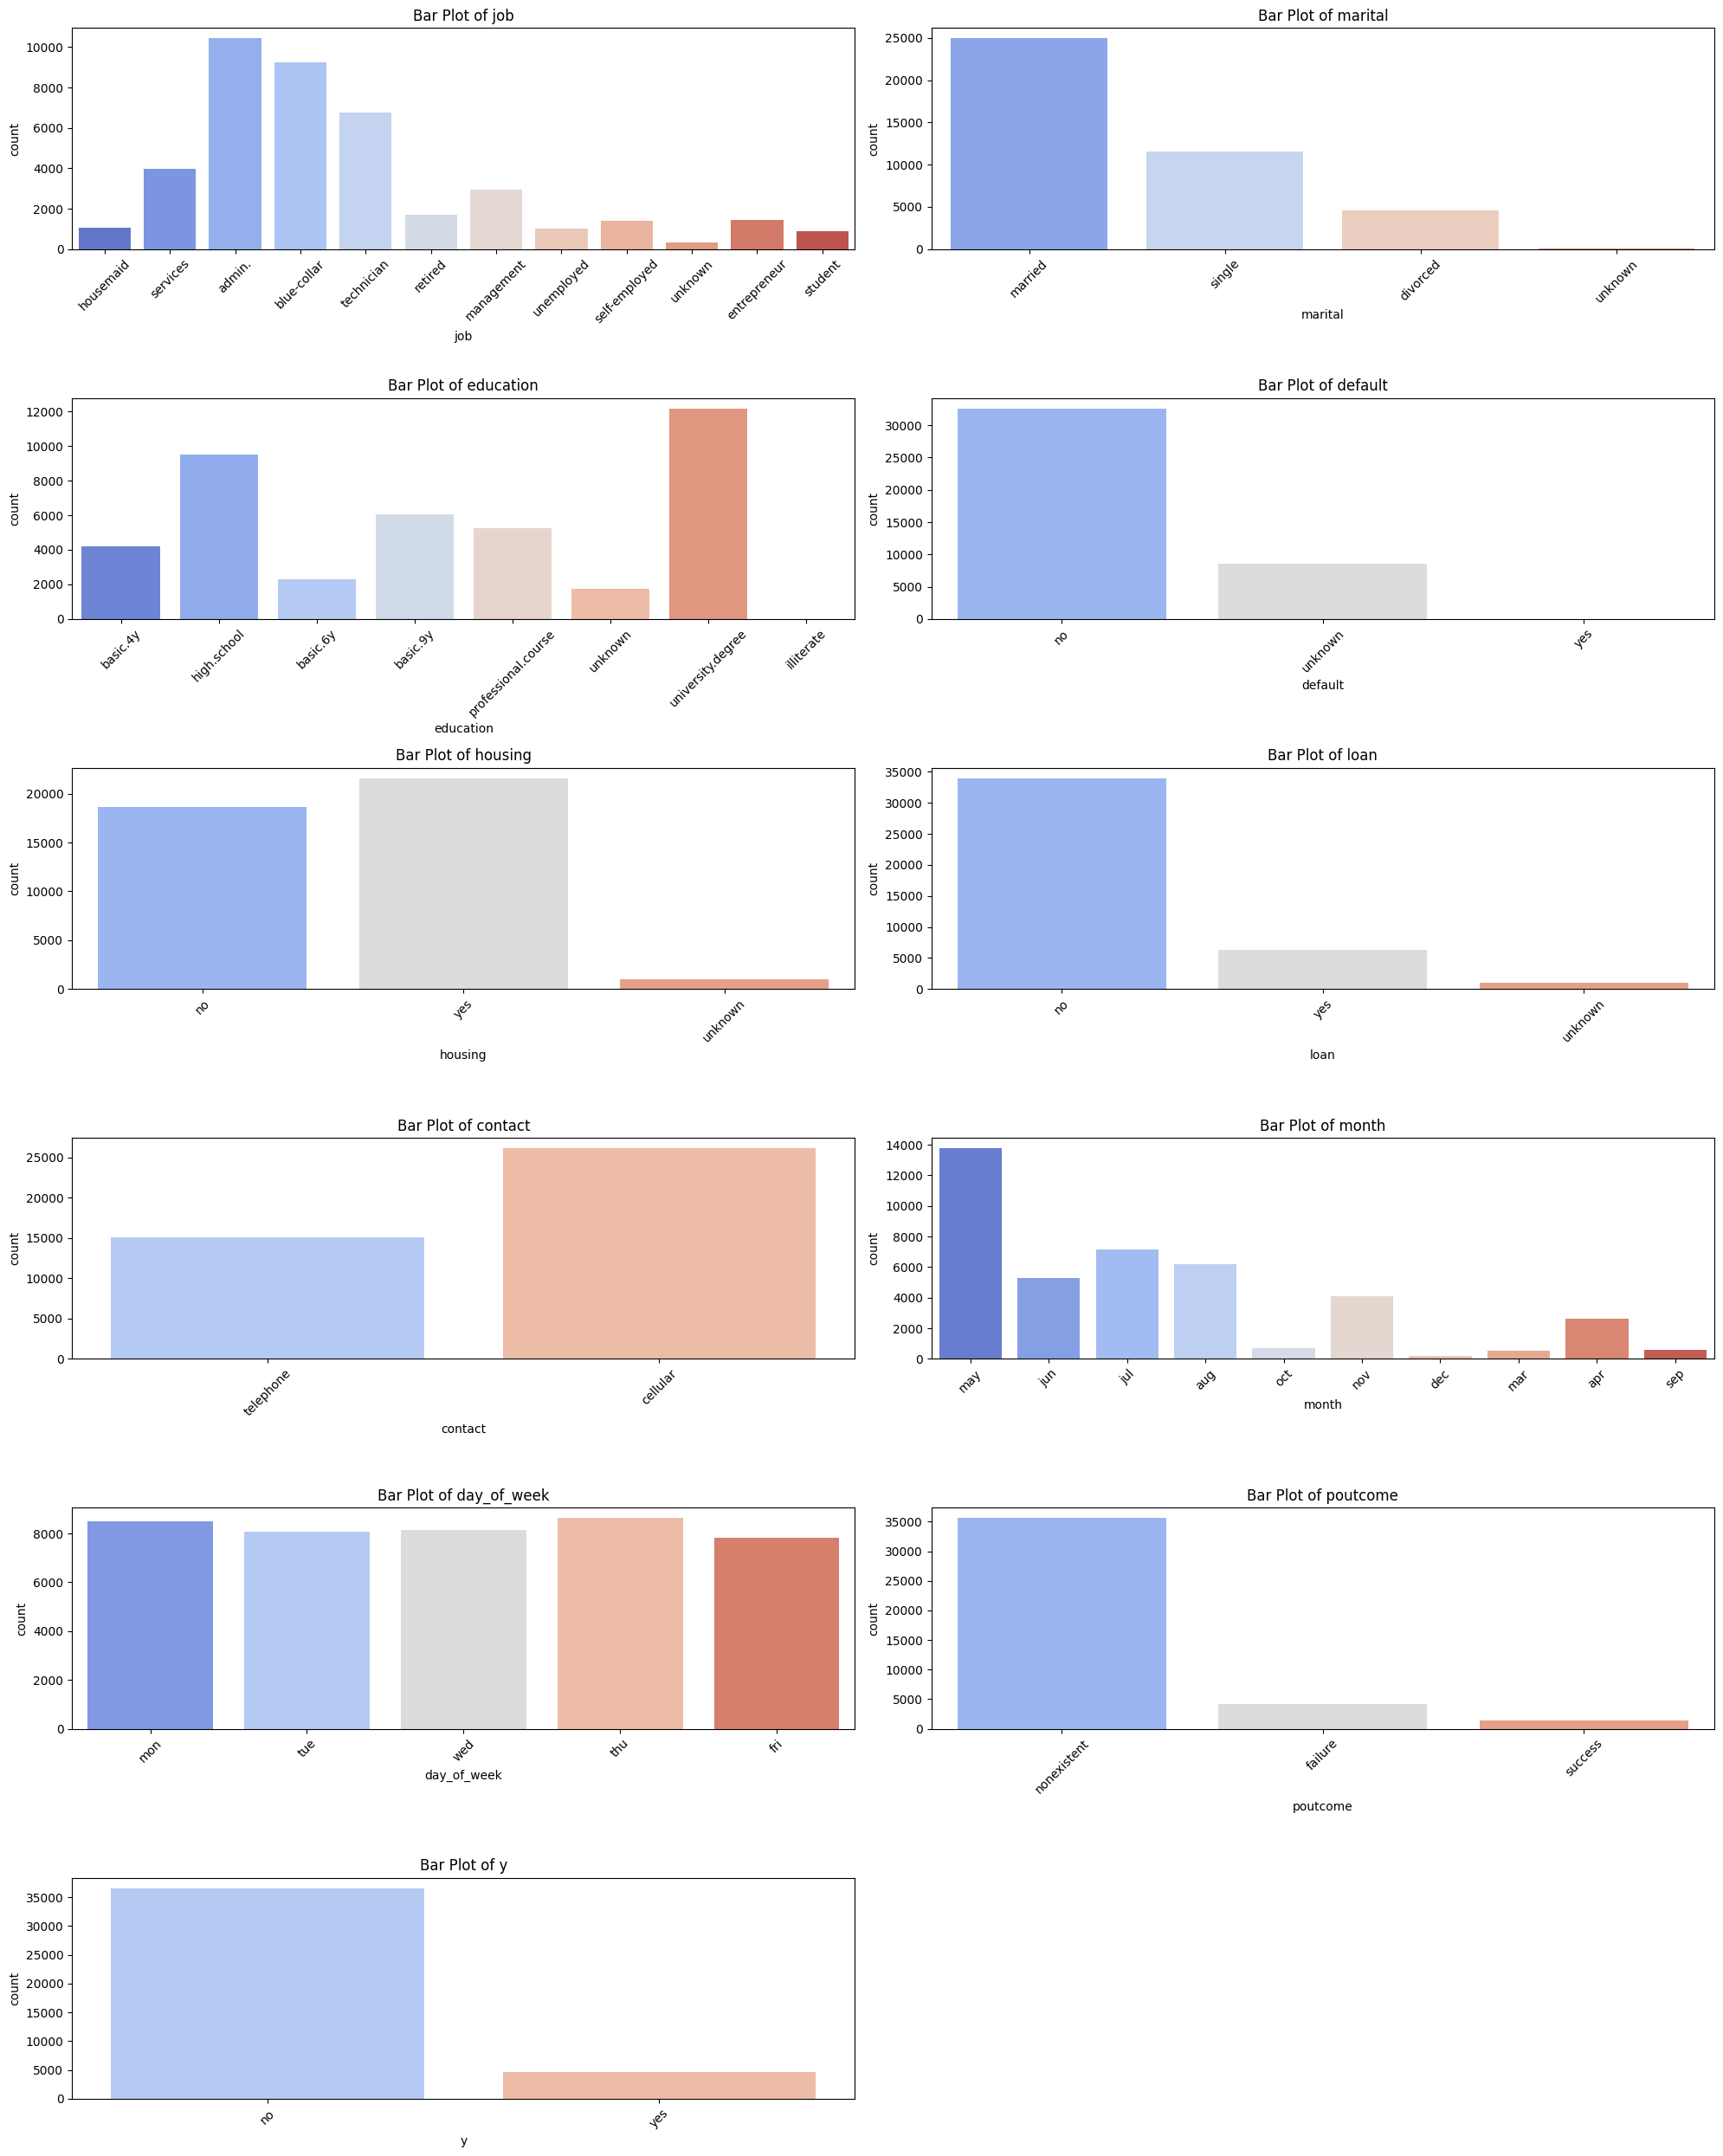

In [28]:
num_plots=len(categorical_columns)
num_rows=(num_plots+1)//2
num_cols=2

plt.figure(figsize=(20,25))

for i, feature in enumerate(categorical_columns,1):
    plt.subplot(num_rows,num_cols,i)
    sns.countplot(x=feature,data=data,hue=feature,palette="coolwarm")
    plt.title(f'Bar Plot of {feature}' )
    plt.xlabel(feature)
    plt.ylabel('count')
    plt.xticks(rotation=45)

plt.tight_layout()
plt.show()

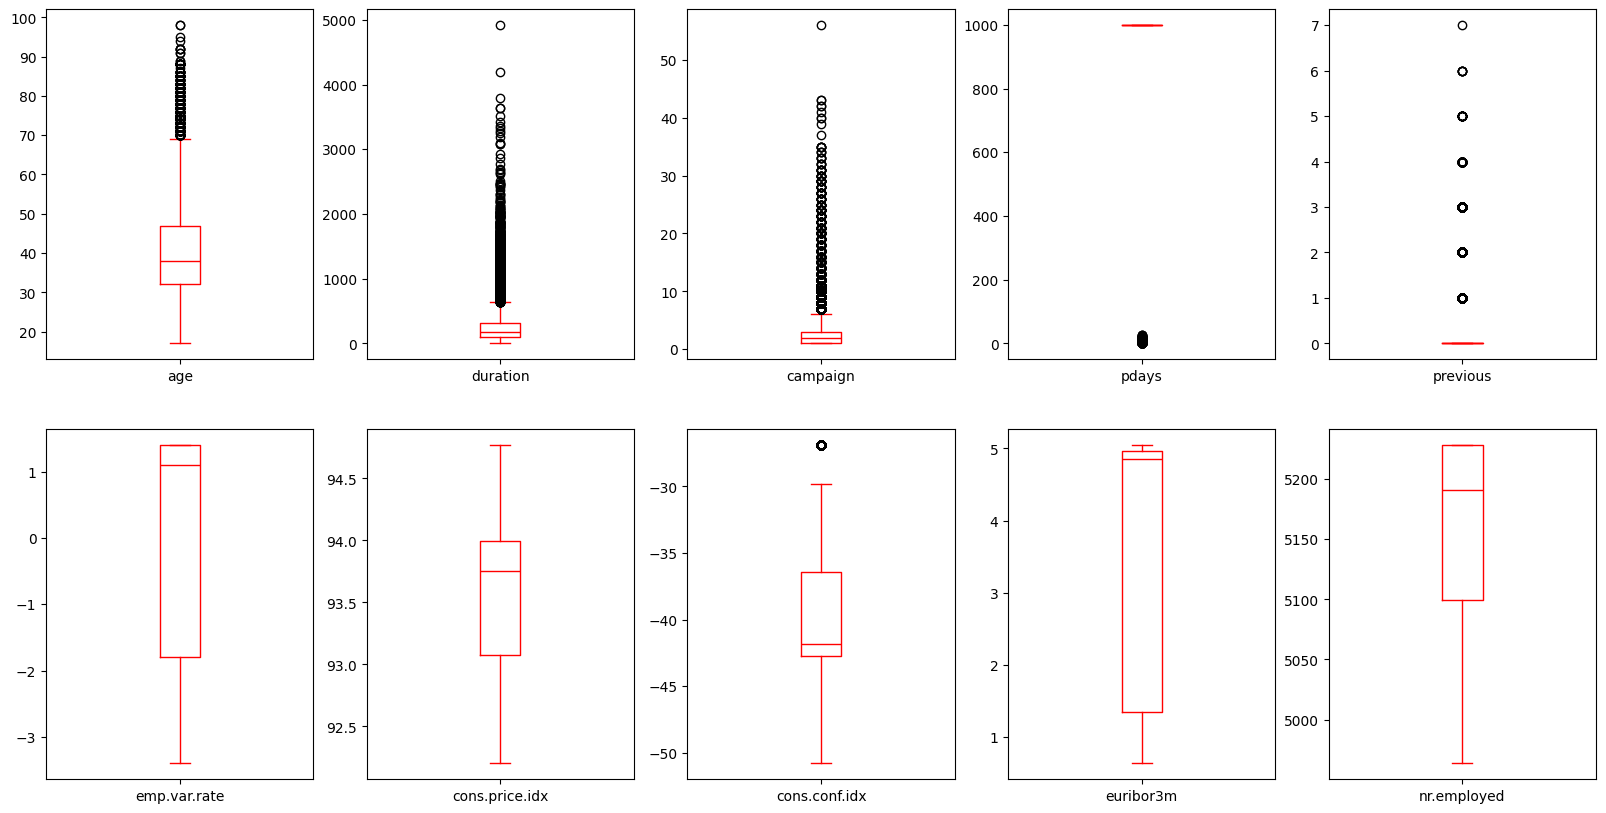

In [29]:
data.plot(kind='box',subplots=True, layout=(2,5),figsize=(20,10),color="red")
plt.show()

In [31]:
numeric_df=data.drop(columns=categorical_columns)
corr = numeric_df.corr()
print(corr)

                     age  duration  campaign     pdays  previous  \
age             1.000000 -0.000866  0.004594 -0.034369  0.024365   
duration       -0.000866  1.000000 -0.071699 -0.047577  0.020640   
campaign        0.004594 -0.071699  1.000000  0.052584 -0.079141   
pdays          -0.034369 -0.047577  0.052584  1.000000 -0.587514   
previous        0.024365  0.020640 -0.079141 -0.587514  1.000000   
emp.var.rate   -0.000371 -0.027968  0.150754  0.271004 -0.420489   
cons.price.idx  0.000857  0.005312  0.127836  0.078889 -0.203130   
cons.conf.idx   0.129372 -0.008173 -0.013733 -0.091342 -0.050936   
euribor3m       0.010767 -0.032897  0.135133  0.296899 -0.454494   
nr.employed    -0.017725 -0.044703  0.144095  0.372605 -0.501333   

                emp.var.rate  cons.price.idx  cons.conf.idx  euribor3m  \
age                -0.000371        0.000857       0.129372   0.010767   
duration           -0.027968        0.005312      -0.008173  -0.032897   
campaign            0.150754 

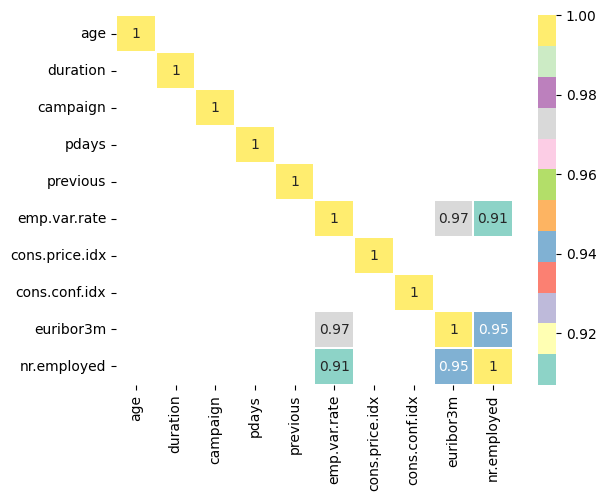

In [32]:
corr=corr[abs(corr)>=0.90]
sns.heatmap(corr, annot= True, cmap='Set3',linewidths = 0.2)
plt.show()

In [33]:
high_corr_cols=['emp.var.rate','euribor3m','nr.employed' ]

In [35]:
df1=data.copy()
df1.columns

Index(['age', 'job', 'marital', 'education', 'default', 'housing', 'loan',
       'contact', 'month', 'day_of_week', 'duration', 'campaign', 'pdays',
       'previous', 'poutcome', 'emp.var.rate', 'cons.price.idx',
       'cons.conf.idx', 'euribor3m', 'nr.employed', 'y'],
      dtype='object')

In [36]:
df1.drop(high_corr_cols, inplace=True,axis=1)
df1.columns

Index(['age', 'job', 'marital', 'education', 'default', 'housing', 'loan',
       'contact', 'month', 'day_of_week', 'duration', 'campaign', 'pdays',
       'previous', 'poutcome', 'cons.price.idx', 'cons.conf.idx', 'y'],
      dtype='object')

In [37]:
df1.shape

(41188, 18)

In [38]:
from sklearn.preprocessing import LabelEncoder
lb=LabelEncoder()
df_encoded = df1.apply(lb.fit_transform)
df_encoded

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,duration,campaign,pdays,previous,poutcome,cons.price.idx,cons.conf.idx,y
0,39,3,1,0,0,0,0,1,6,1,261,0,26,0,1,18,16,0
1,40,7,1,3,1,0,0,1,6,1,149,0,26,0,1,18,16,0
2,20,7,1,3,0,2,0,1,6,1,226,0,26,0,1,18,16,0
3,23,0,1,1,0,0,0,1,6,1,151,0,26,0,1,18,16,0
4,39,7,1,3,0,0,2,1,6,1,307,0,26,0,1,18,16,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
41183,56,5,1,5,0,2,0,0,7,0,334,0,26,0,1,25,0,1
41184,29,1,1,5,0,0,0,0,7,0,383,0,26,0,1,25,0,0
41185,39,5,1,6,0,2,0,0,7,0,189,1,26,0,1,25,0,0
41186,27,9,1,5,0,0,0,0,7,0,442,0,26,0,1,25,0,1


In [39]:
df_encoded['y'].value_counts()

,count
y,
0,36548
1,4640


In [40]:
x=df_encoded.drop('y', axis=1)
y=df_encoded['y']  # wherex= independent variable and y= dependent variable
print(x.shape)
print(y.shape)
print(type(x))
print(type(y))

(41188, 17)
(41188,)
<class 'pandas.core.frame.DataFrame'>
<class 'pandas.core.series.Series'>


In [41]:
from sklearn.model_selection import train_test_split

In [42]:
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.2, random_state=1)
print(x_train.shape)
print(x_test.shape)
print(y_train.shape)
print(y_test.shape)

(32950, 17)
(8238, 17)
(32950,)
(8238,)


In [43]:
from sklearn.metrics import confusion_matrix, classification_report, accuracy_score

def eval_model(y_test,y_pred):
    acc=accuracy_score(y_test,y_pred)
    print('Accuracy_score', acc)
    cm= confusion_matrix(y_test,y_pred)
    print('confusion_matrix\n',cm)
    print('classification_report\n', classification_report(y_test,y_pred))

def mscore(model):
    train_score = model.score(x_train,y_train)
    test_score = model.score(x_test,y_test)
    print('Trainning Score', train_score)
    print('Test Score', test_score)

In [44]:
from sklearn.tree import DecisionTreeClassifier

dt = DecisionTreeClassifier(criterion= 'gini', max_depth=5, min_samples_split=10)
dt.fit(x_train, y_train)

DecisionTreeClassifier(max_depth=5, min_samples_split=10)

In [45]:
mscore(dt)

Trainning Score 0.9112594840667678
Test Score 0.9089584850691915


In [46]:
ypred_dt= dt.predict(x_test)
print(ypred_dt)

[0 0 0 ... 0 0 0]


In [47]:
eval_model(y_test, ypred_dt)


Accuracy_score 0.9089584850691915
confusion_matrix
 [[7066  228]
 [ 522  422]]
classification_report
               precision    recall  f1-score   support

           0       0.93      0.97      0.95      7294
           1       0.65      0.45      0.53       944

    accuracy                           0.91      8238
   macro avg       0.79      0.71      0.74      8238
weighted avg       0.90      0.91      0.90      8238



In [48]:
from sklearn.tree import plot_tree


In [49]:
cn= ['no','yes']
fn= x_train.columns
print(fn)
print(cn)

Index(['age', 'job', 'marital', 'education', 'default', 'housing', 'loan',
       'contact', 'month', 'day_of_week', 'duration', 'campaign', 'pdays',
       'previous', 'poutcome', 'cons.price.idx', 'cons.conf.idx'],
      dtype='object')
['no', 'yes']


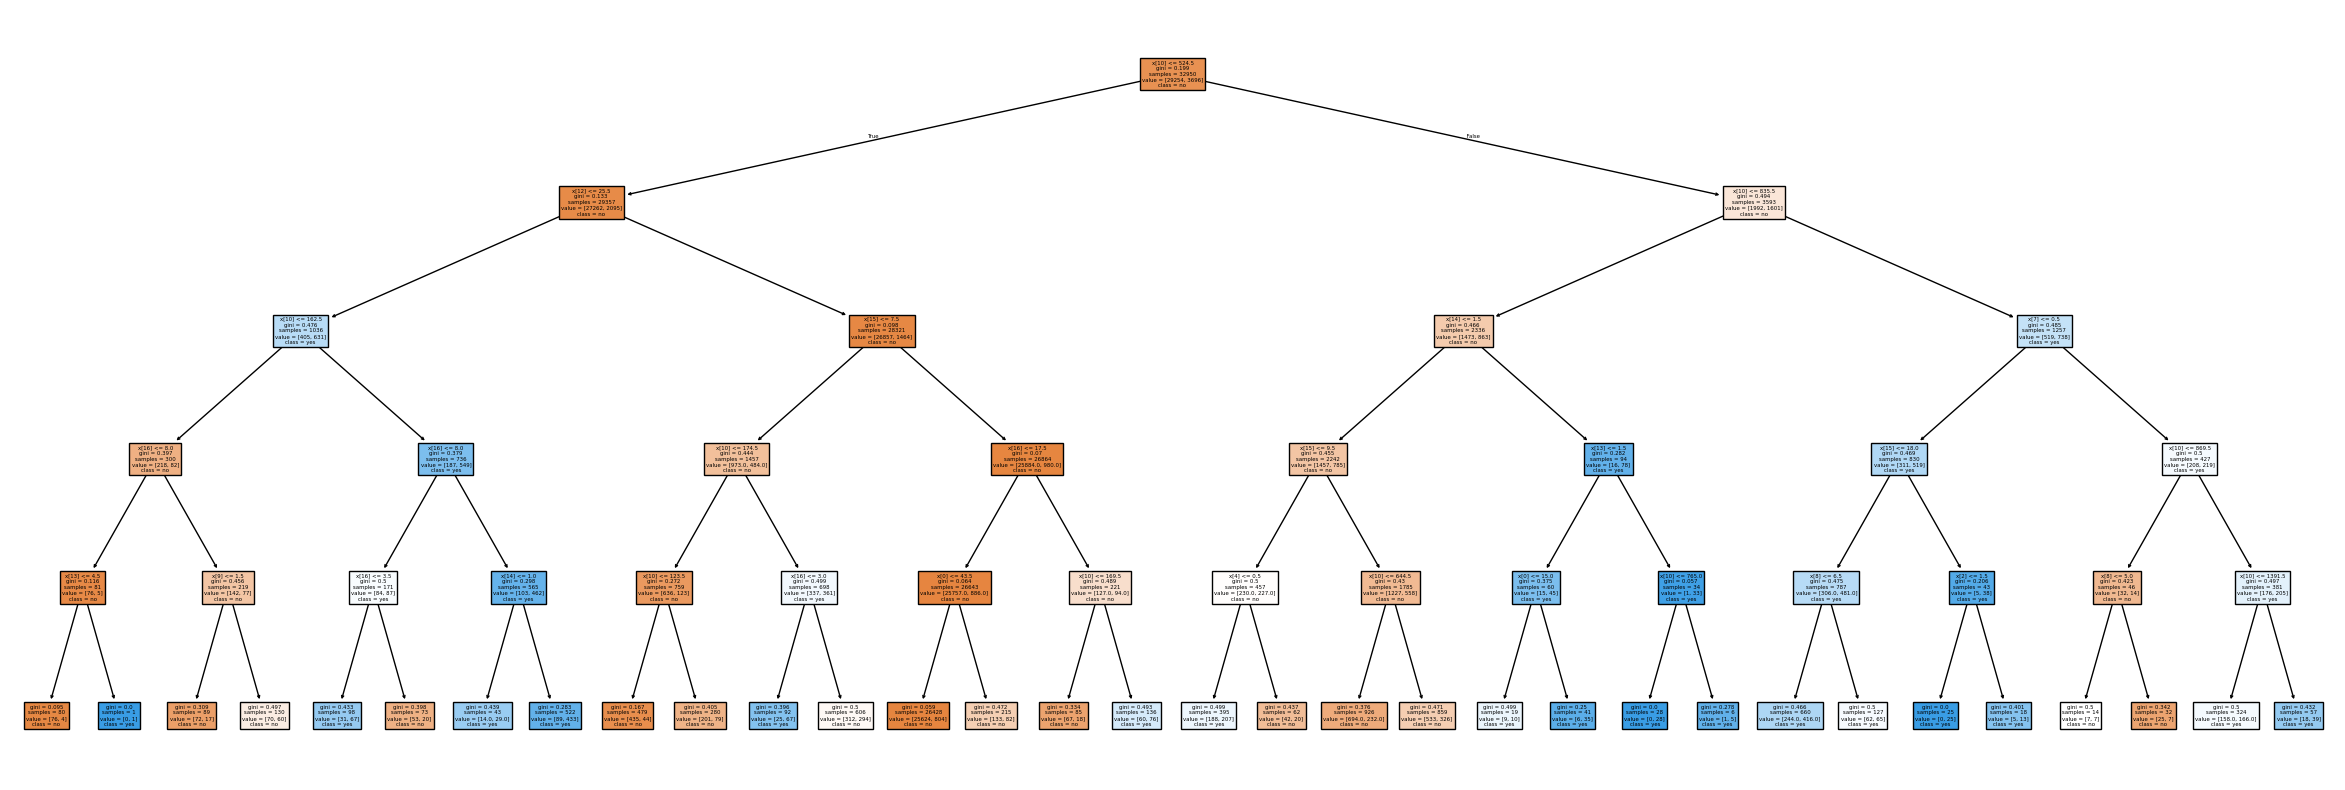

In [50]:
plt.figure(figsize=(30,10))
plot_tree(dt,class_names = cn,filled=True)
plt.show()

In [51]:
dt1=DecisionTreeClassifier(criterion='entropy',max_depth=4,min_samples_split=15)
dt1.fit(x_train,y_train)

DecisionTreeClassifier(criterion='entropy', max_depth=4, min_samples_split=15)

In [52]:
mscore(dt1)

Trainning Score 0.9078603945371776
Test Score 0.906409322651129


In [53]:
ypred_dt1=dt1.predict(x_test)

In [54]:
eval_model(y_test,ypred_dt1)

Accuracy_score 0.906409322651129
confusion_matrix
 [[7135  159]
 [ 612  332]]
classification_report
               precision    recall  f1-score   support

           0       0.92      0.98      0.95      7294
           1       0.68      0.35      0.46       944

    accuracy                           0.91      8238
   macro avg       0.80      0.66      0.71      8238
weighted avg       0.89      0.91      0.89      8238



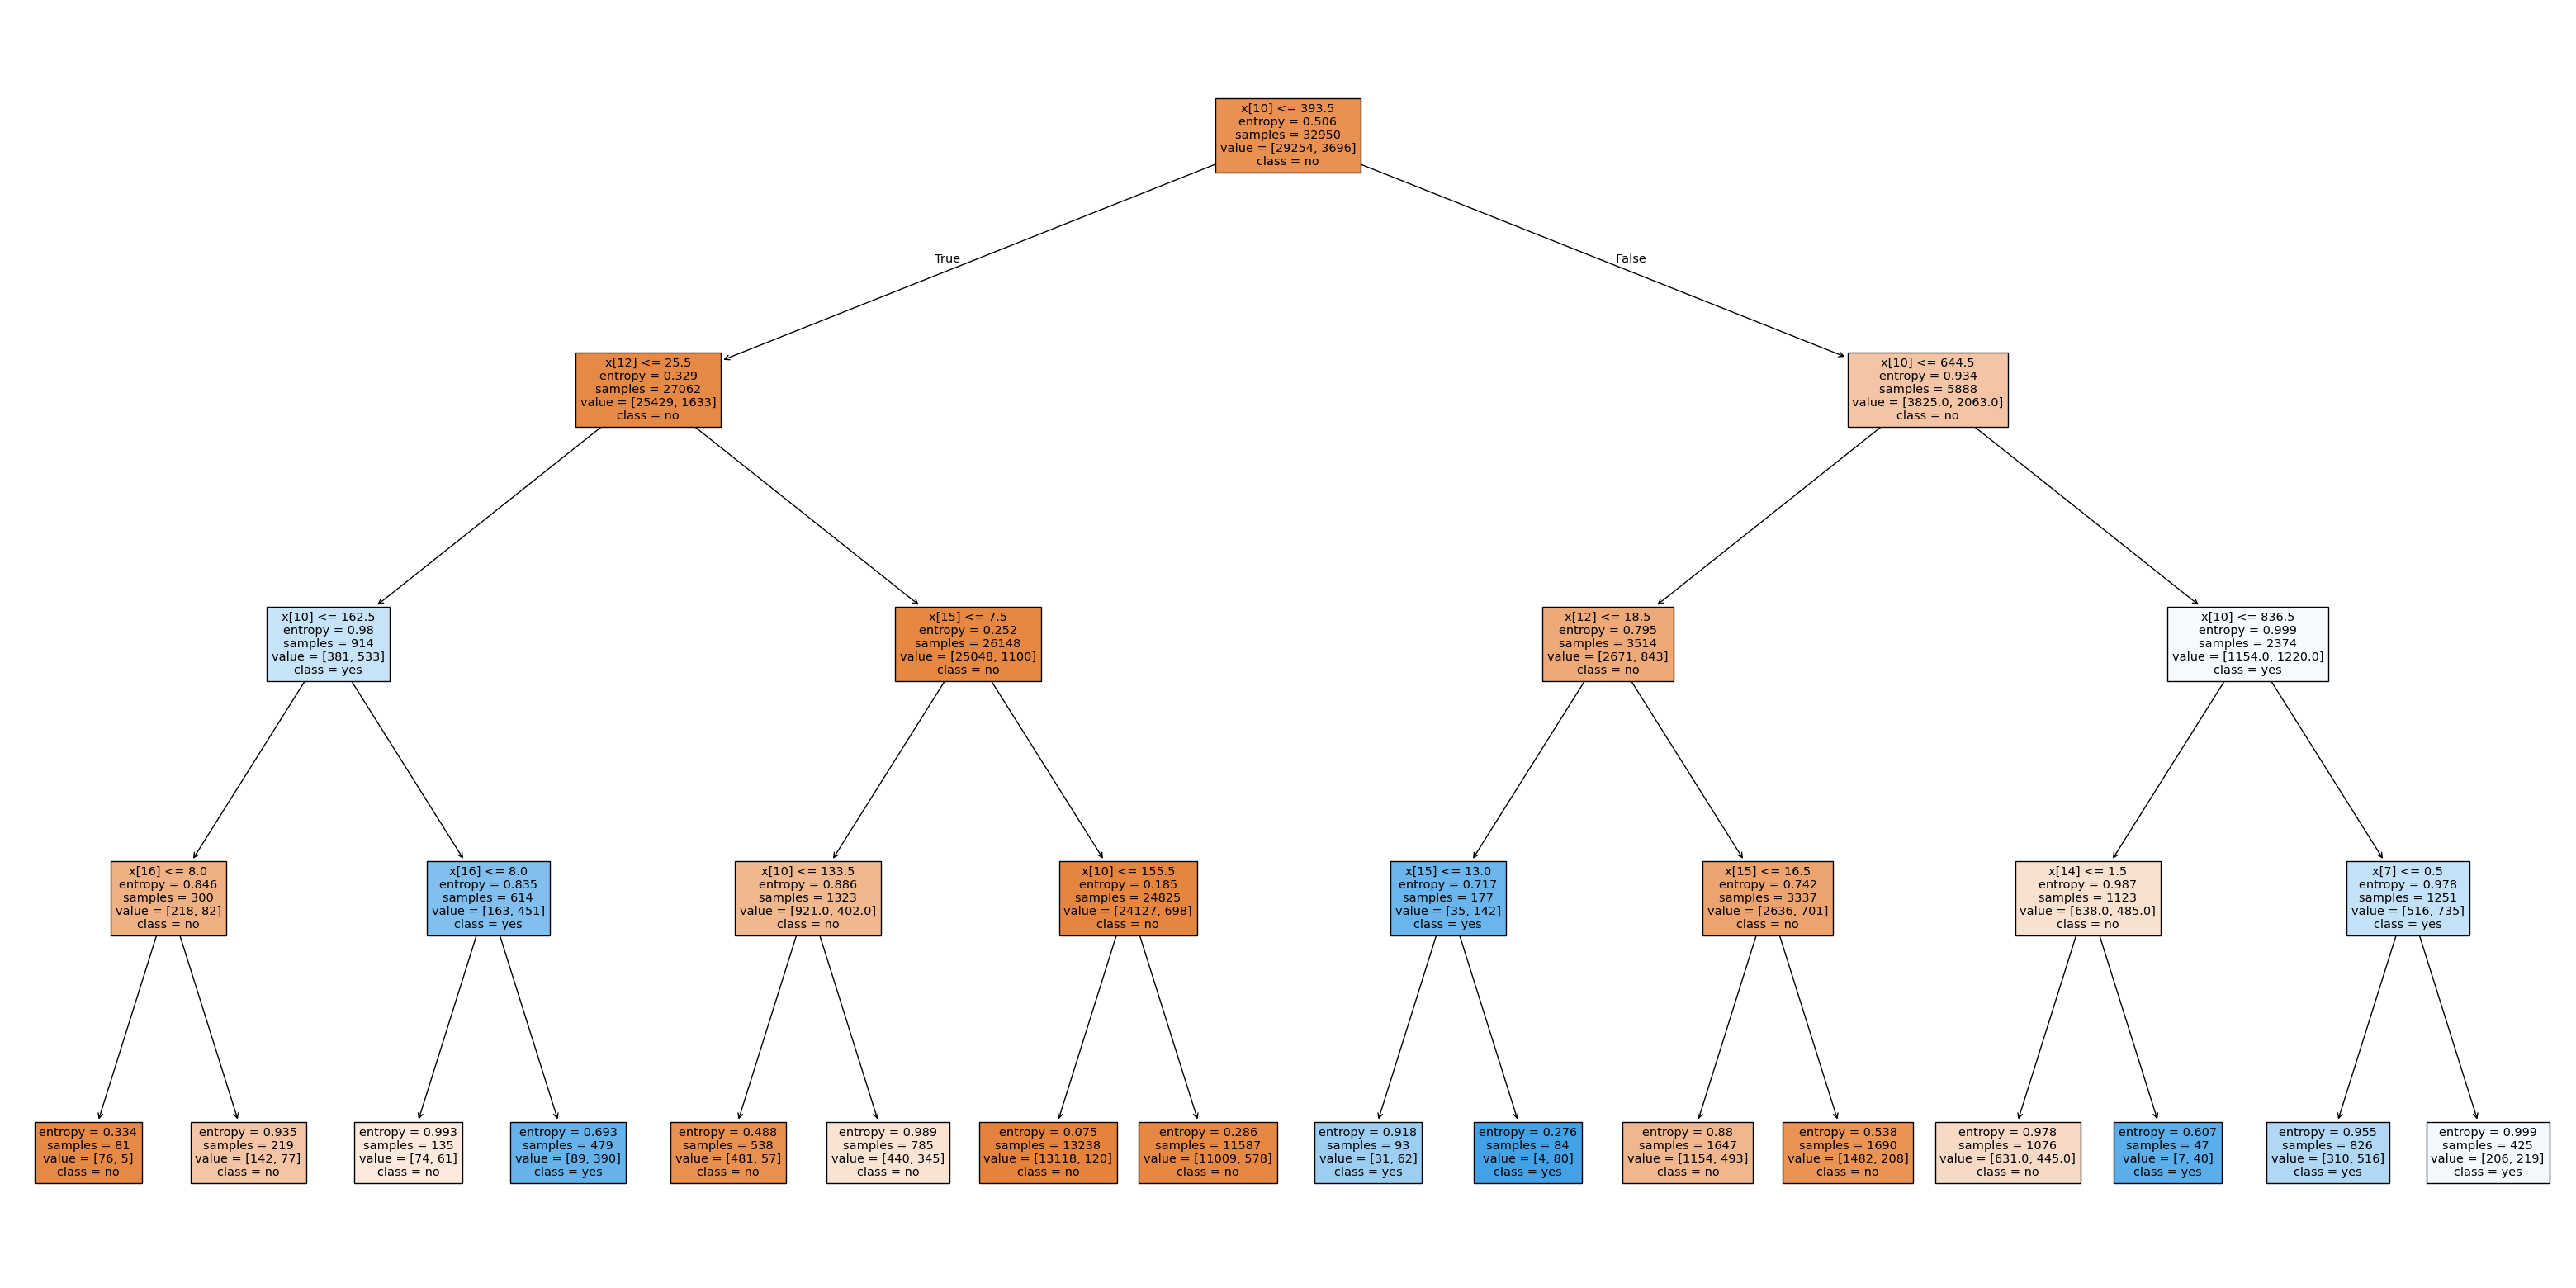

In [55]:
plt.figure(figsize=(40,20))
plot_tree(dt1,class_names=cn, filled=True)
plt.show()